# Business Case: LoanTap Logistic Regression

## Business Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

## Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
 
## Data dictionary:

- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- term : The number of payments on the loan. Values are in months and can be either 36 or 60.

- int_rate : Interest Rate on the loan

- installment : The monthly payment owed by the borrower if the loan originates.

- grade : LoanTap assigned loan grade

- sub_grade : LoanTap assigned loan subgrade

- emp_title :The job title supplied by the Borrower when applying for the loan.*

- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

- annual_inc : The self-reported annual income provided by the borrower during registration.

- verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

- issue_d : The month which the loan was funded

- loan_status : Current status of the loan - Target Variable

- purpose : A category provided by the borrower for the loan request.

- title : The loan title provided by the borrower

- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

- earliest_cr_line :The month the borrower's earliest reported credit line was opened

- open_acc : The number of open credit lines in the borrower's credit file.

- pub_rec : Number of derogatory public records

- revol_bal : Total credit revolving balance

- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

- total_acc : The total number of credit lines currently in the borrower's credit file

- initial_list_status : The initial listing status of the loan. Possible values are – W, F

- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

- mort_acc : Number of mortgage accounts.

- pub_rec_bankruptcies : Number of public record bankruptcies

- Address: Address of the individual
 
## Concept Used:

- Exploratory Data Analysis
- Feature Engineering
- Logistic Regression
- Precision Vs Recall Tradeoff


# Solution:

## Import common packages and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#set seaborn theme
sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv('loantap_logistic_regression.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# describe numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [7]:
#describe non-numeric features
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Detecting missing values

In [8]:
#missing values per column
missing_vals = df.isna().sum().where(lambda cnt : cnt > 0).dropna()
missing_vals.to_frame(name='missing_val_count').assign(missing_val_percent=(missing_vals / df.shape[0])*100).sort_values(by='missing_val_count', ascending=False)

,missing_val_count,missing_val_percent
mort_acc,37795.0,9.543469
emp_title,22927.0,5.789208
emp_length,18301.0,4.621115
title,1755.0,0.443148
pub_rec_bankruptcies,535.0,0.135091
revol_util,276.0,0.069692


In [9]:
# Rows with atleast one missing value.
missing_rows_count = df[df.isnull().any(axis=1)].shape[0]
missing_row_percent = (missing_rows_count / df.shape[0]) * 100
print(f'Rows with missing values- count:{missing_rows_count}, percentage:{missing_row_percent}')

Rows with missing values- count:60162, percentage:15.191273388379667


**Observations**

1. The dataset has 396030 rows and 27 columns. loan_status is the target variable with values 'Fully Paid' and 'Charged Off'. 

2. 'mort_acc' (9.5%), 'emp_title'(5.7%), 'emp_length'(4.62%), 'title'(0.44%), 'pub_rec_bankruptcies'(0.14%), and 'revol_util'(0.07%) columns have missing values. Other columns do not have missing values. 

3. Around 15% of total rows have some missing values. As we shall see later, we will not be using emp_title variable in our model. Therefore, we will ignore missing values in that column. Since our dataset size seems adequate, for the remaining columns, for this case study, we will remove rows with missing values.

### Removing rows with missing values

In [10]:
cols = ['mort_acc', 'emp_length', 'title', 'pub_rec_bankruptcies', 'revol_util']

n_before = df.shape[0]
df.dropna(axis=0, subset=cols, inplace=True)
df.reset_index(drop=True, inplace=True)
n_after = df.shape[0]
#df.info()
print(f'Total reduction in rows afer removing missing values: {(n_before-n_after) * 100 /(n_before)}%')

Total reduction in rows afer removing missing values: 14.338812716208368%


### Outliers Detection

In [11]:
#iqr method to find outliers
def findoutliers(arr):        
    q3 = np.percentile(arr, 75)
    q1 = np.percentile(arr, 25)    
    iqr = q3-q1
    ulim = q3 + 1.5*iqr
    llim = q1 - 1.5*iqr
    return pd.Series([True if((ele > ulim) or (ele < llim)) else False for ele in arr])

def makepositive(s, pos_val=0.01):
    return s.transform(lambda val: val if(val > 0) else pos_val)

n = df.shape[0]
outliers = []
outlier_rows = pd.Series([False]*n) 
cols = set(df.select_dtypes('number').columns) - set(['loan_status'])

transformations = [
    (' none', lambda c:c),
    ('  sqrt', lambda c: np.sqrt(makepositive(c))),
    ('    cuberoot', lambda c: np.power(makepositive(c), 1/3)),
    (' log', lambda c: np.log(makepositive(c)))]

for col in cols:
    for tr_name, tr_fn in transformations:
        ret = findoutliers(tr_fn(df[col]))
        outliers_n = ret.sum()
        outliers.append([col, tr_name, outliers_n, np.round((outliers_n / n) * 100, 3)])
    
outliers_df = pd.DataFrame(outliers, columns=['feature', 'transform', 'outlier count', 'outlier %'])
outliers_df = outliers_df.set_index(keys=['feature', 'transform'])
outliers_df = outliers_df.unstack()
outliers_df

outlier count                         outlier %          \
transform                 cuberoot   sqrt    log   none     cuberoot    sqrt   
feature                                                                        
annual_inc                    8206   9358   5311  16026        2.419   2.758   
dti                           5310   2644  11417    198        1.565   0.779   
installment                   1476    428   6876   9520        0.435   0.126   
int_rate                        50    206   2249   1198        0.015   0.061   
loan_amnt                        0      0   5662    179        0.000   0.000   
mort_acc                         0     81      0   6457        0.000   0.024   
open_acc                      4463   5466   5093   9702        1.316   1.611   
pub_rec                      51191  51191  51191  51191       15.090  15.090   
pub_rec_bankruptcies         39770  39770  39770  39770       11.723  11.723   
revol_bal                     8341   8280  10972  17902        2.459   2.441   
revol_util                   10737   7158  17628     14        3.165   2.110   
total_acc                     1597   1200   4647   5344        0.471   0.354   

                                      
transform                log    none  
feature                               
annual_inc             1.566   4.724  
dti                    3.365   0.058  
installment            2.027   2.806  
int_rate               0.663   0.353  
loan_amnt              1.669   0.053  
mort_acc               0.000   1.903  
open_acc               1.501   2.860  
pub_rec               15.090  15.090  
pub_rec_bankruptcies  11.723  11.723  
revol_bal              3.234   5.277  
revol_util             5.196   0.004  
total_acc              1.370   1.575

**Observations**

1. The table shown above shows outlier count and percent for all numerical variables. We show these information for the original variable (transform=none), as well as for transformed versions of these variables after taking log, sqrt, and cube root transformations. 

2. We notice that pub_rec (15.09%), pub_rec_bankruptcies (11.73%), revol_bal (5.28%), annual_inc (4.65%), open_acc(2.9%), and installment (2.7%) are features having high outlier values. The remaining features have outlier % < 2%. 

### Outliers treatment

1. We will convert pub_rec, mort_acc, and pub_rec_bankruptcies to binary flags. So we can ignore them from the outliers analysis. 

2. For annual_inc and open_acc, we will apply log transform before removing outliers. 

3. For installment, we will apply sqrt transformation before removing outliers. 

4. For the remaining features, we will just remove the outliers.

In [12]:
df.reset_index(drop=True, inplace=True)

#prepare list of rows to be removed
rem_list = [False] * len(df)
rem_list = rem_list | findoutliers(np.log(makepositive(df['annual_inc'])))
rem_list = rem_list | findoutliers(np.log(makepositive(df['open_acc'])))
rem_list = rem_list | findoutliers(np.sqrt(makepositive(df['installment'])))

cols = ['dti', 'int_rate', 'loan_amnt', 'revol_bal', 'revol_util', 'total_acc']

for col in cols:    
    rem_list = rem_list | findoutliers(df[col])

#remove rows

df = df[~rem_list]

print(f'Reduction in rows after outliers removal: {np.round(np.sum(rem_list)/len(df) * 100,2)}%')

Reduction in rows after outliers removal: 10.43%


## Create train-test splits

In [13]:
from sklearn.model_selection import train_test_split

dfX = df[df.columns.drop('loan_status')]
dfy = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, train_size=0.8 ,random_state=100)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)

## Common helper functions

In [14]:
# plots univariate plot(count or box) for feature x. 
# Optionally also plots bivariate plot (count or scatter) between x and y.
def showplots(x, y=None, vartype=('cat', 'cat'), axs=None):
    total = float(x.shape[0])
    bivar=(y is not None)
    
    #initialize 
    if(axs is None):
        size = None
        if(bivar):
            size = (12, 4) if (size is None) else size
            gridrows = 1
            gridcols = 2
        else:
            size = (6, 4) if (size is None) else size
            gridrows = 1
            gridcols = 1
    
        fig, ax = plt.subplots(gridrows, gridcols, figsize=size)        
        axs = (ax[0], ax[1]) if (bivar) else (ax, None)
    
    #plot univariate
    ax_curr = axs[0]
    
    if(vartype[0] == 'cat'):    
        #plot count plot
        sns.countplot(x=x, ax=ax_curr)
        
        #show percentage
        showpercent(ax_curr, total)
    
    else: 
        #plot box plot
        sns.boxplot(x=x, ax=ax_curr)
        
    #plot bivariate
    if(bivar):
        ax_curr = axs[1]
        if(vartype[0] == 'cat'):
            sns.countplot(x=x, hue=y, ax=ax_curr);
            
            #plot within hue percentages
            showpercent_with_hue(ax_curr, hue_levels = len(y.unique()), x_levels=len(x.unique()))
        else:
            sns.boxplot(x=x, y=y.astype('category'), ax=ax_curr)
            
    plt.show()

def showpercent(ax, total):
    for p in ax.patches:
            percent = '{:.1f}%'.format(100 * p.get_height()/total)
            xpos = p.get_x() + p.get_width()/2
            ypos = p.get_height()
            ax.annotate(percent, (xpos, ypos),ha='center', va='bottom')
            
def showpercent_with_hue(ax, hue_levels, x_levels):
            
    heights = np.array([p.get_height() for p in ax.patches]).reshape((hue_levels, x_levels))
    percents = np.round((heights * 100) / np.sum(heights, axis=0),1)
    perclist = percents.flatten(order='C') #flatten in column-major (F-style) order
            
    for i in range(len(ax.patches)):                
        p = ax.patches[i]
        percent = f'{perclist[i]}%'
        xpos = p.get_x() + p.get_width()/2
        ypos = p.get_height()
        ax.annotate(percent, (xpos, ypos),ha='center', va='bottom')

from collections import namedtuple
TfResult = namedtuple('TfResult', ['res', 'params'])
 
#Helper class to manage feature transformations    
class TransformationHelper:
    
    def __init__(self):
        
        # holds transformation model specific to each transform/encoding. 
        # In general, fit_transform creates and fits the transformation model. transform uses the model to return output
        self._tfs = {}
        
    def fit_transform(self, tf_col, tf_fn, **kwargs):        
        
        if((tf_col is not None) and (tf_fn is not None)):
            
            #get feature name (to store in _tfs)
            tf_col_name = tf_col.name
            
            # call transformation function with params
            res, params = tf_fn(None, tf_col, **kwargs)
            
            #store tf_fn and params for later use in transform
            self._tfs[tf_col_name] = (tf_fn, params)
            
            #return transformed data
            return res
        
    def transform(self, tf_col, **kwargs):
        tf_col_name = tf_col.name
        if(tf_col_name in self._tfs.keys()):
            tf_fn, params = self._tfs[tf_col_name]
            res, params = tf_fn(params, tf_col, **kwargs)
            return res
        
    def transform_all(self, df):        
        
        for col_name, details in self._tfs.items():
            if(col_name in df.columns):                
                fn = details[0]
                params = details[1]
                res, params = fn(params, df[col_name])
                if(res is not None):
                    df[col_name] = res
                                




#common standardization function 
def standardize_fn(params, x, **kwa):        
    xval = x.values.reshape(-1,1) #convert series to 2d array
    if(params is None):        
        params = StandardScaler().fit(xval)
    res = params.transform(xval)
    return(res, params)   

#common targetencoder factory method
def get_targetenc_fn(smoothing=1.0, k=1, standardize=True):
    def tfn(params, x, **kwa):       

        if(params is None): #fit_transform case
            y = kwa['y']
            tenc = TargetEncoder(smoothing=smoothing, min_samples_leaf=k).fit(x, y)
            tenc_res = tenc.transform(x)
            fs = StandardScaler().fit(tenc_res)
            res = fs.transform(tenc_res)            
            params = (tenc, fs)

        tenc = params[0]
        fs = params[1]
        
        res = fs.transform(tenc.transform(x))
        return(res, params)
    
    return tfn; #return target encoder function

In [15]:
transformation_helper = TransformationHelper()

## Understanding and preprocessing categorical features

### loan_status (target variable)

Indicates the current status of the loan. 

In [16]:
y_train.value_counts()

Fully Paid     197138
Charged Off     48626
Name: loan_status, dtype: int64

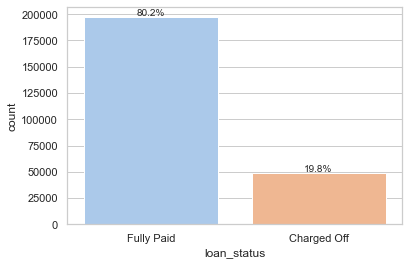

In [17]:
showplots(y_train)

In [18]:
#map Fully Paid as 0 and Charged Off as 1
def tfn(params, y, **kwa):        
    return (y.map({'Fully Paid': 0, 'Charged Off': 1, 1:1, 0:0}), None)
    
y_train = transformation_helper.fit_transform(y_train, tfn)
df_train['loan_status'] = y_train

**Observations:**

1. loan_status is our target variable with two values; Fully paid and Charged Off(borrower defaulted). We encode Fully paid as 0 and Charged Off as 1, so our final model will predict 0 for borrowers who it deems creditworthy and 1 for those who may potentially default. 

2. The data is moderately imbalanced. Around 80% of the records belong to class 0 and 20% belong to class 1. We will use class_weights parameter in sklearn LogisticRegression API to handle this.  

### term

In [19]:
X_train['term'].value_counts()

 36 months    188091
 60 months     57673
Name: term, dtype: int64

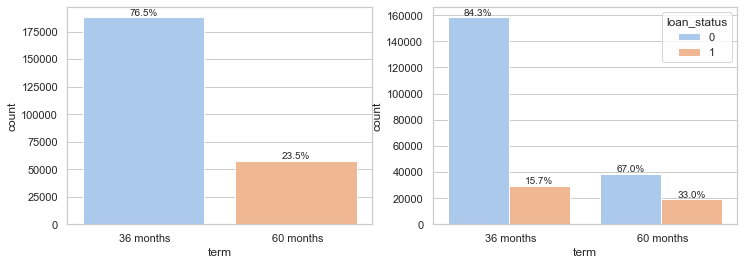

In [20]:
showplots(x=X_train['term'], y=y_train)

In [21]:
# remove months suffix and convert to binary column
def tfn(params, x, **kwa):        
    return (x.map({' 36 months': 0, ' 60 months': 1, 1:1, 0:0}), None)
    
X_train['term'] = transformation_helper.fit_transform(X_train['term'], tfn)

**Observations**

1. Around 76% of the records are for 36 months term and 24% for 60 months term. 

2. For 36 months term, the percentage of defaulters is 15.7% which is less than the overall defaulter percentage of ~20%. On the other hand, for 60 months term, the percentage of defaulters increases to 32.6%. Thus term seems like an important factor in determining creditworthiness.

### grade

In [22]:
X_train['grade'].value_counts()

B    73035
C    68012
D    39955
A    36905
E    19494
F     7160
G     1203
Name: grade, dtype: int64

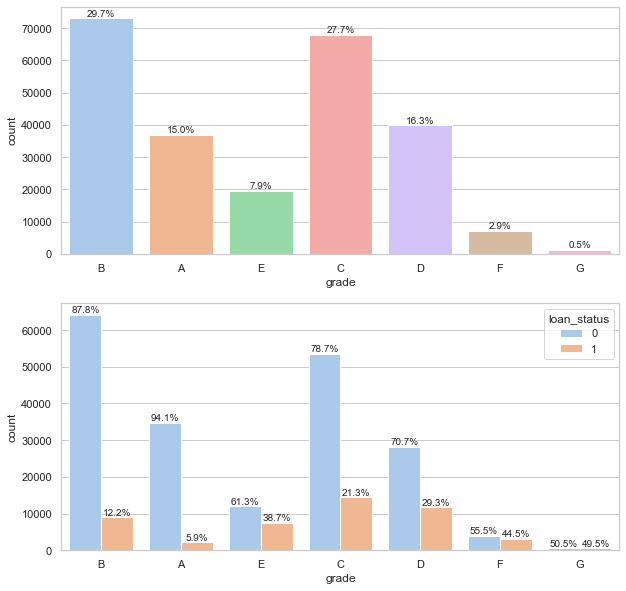

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
showplots(x=X_train['grade'], y=y_train, axs=axs)

**Observations**

1. There are total seven loan grades. A, B, C, D, E, F, and G.  Grade B is the most common grade(constituting 29.2% records), followed by Grade C (27.5%), Grade D (16.3%), and Grade A(15.2%). Grade E, Grade F, and Grade G constitute smaller percent of total records (8%, 3%, and <1% respectively).

2. The defaulter rate for grade A loans(6%) and grade B loans(12.1%) are less than the overall defaulter rate. The defaulter rate for grade C loans (21%) is almost equal to the overall defaulter rate. The defaulter rate, on the other hand, for Grade D, E, F, and G are all higher than the overall defaulter rate. Thus, in general, as the grade of loan increase from A to G, the defaulter rate is increasing monotonically. Thus grade of loan appears to be an important factor in determining creditworthiness. 

### sub_grade

In [ ]:
X_train['sub_grade'].value_counts()

In [ ]:
#confirm if sub-grade '<G><SG>' belongs to grade '<G>'
(X_train['sub_grade'].str.slice(0,1) == X_train['grade']).value_counts()

In [ ]:
#Since there are 35 subgrades, it's difficult to visualize all levels in one plot. We can draw several plots.

grades = sorted(X_train['grade'].unique())
fig, ax = plt.subplots(len(grades), 1, figsize=(10,24))

x = 'sub_grade'
y = 'loan_status'

for i in range(len(grades)):
    grade_mask = X_train['grade'] == grades[i]
    xvar = X_train[grade_mask]['sub_grade']
    yvar = y_train[grade_mask]
    
    sns.countplot(x=xvar, hue=yvar, ax=ax[i]);
    
    #plot within hue percentages
    showpercent_with_hue(ax[i], hue_levels = len(yvar.unique()), x_levels=len(xvar.unique()))

plt.show()


In [ ]:
# check defaulter ratio for each subgrade
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1, 1:1, 0:0})
df_plt = df.groupby('sub_grade')['loan_status'].mean().transform(lambda x: x*100).reset_index().rename(columns={'loan_status': 'defaulter %'}).sort_values(by='sub_grade')
fig, ax = plt.subplots(1,1, figsize=(10,4))
sns.lineplot(x='sub_grade', y='defaulter %', data=df_plt, ax=ax)
plt.show()

**Observations**

1. There are total 35 sub-grades, with each grade 'R' having sub-grades R1 to R5. Most common five sub-grades are B3, B4, C1, C2, and B2. 

2. As shown in the graph above, in general, for a given grade 'R', as we go from sub-grade 'R1' to 'R5', the defaulter rate increases. Also, in general, there is an ordering among sub-grades belonging to different grades. So 'Ri' has lower defaulter rate than 'Sj' if grade 'R' is lower than grade 'S'. Thus, sub-grade also appears to be an important factor in determining creditworthiness. 

3. We see that grades and sub-grades are closely related as sub-grades provides more granular categorization of grades. TODO: We may potentially need only one of them in our model. 

#### Converting grade and sub-grade to numerical variables 

We will use target encoding to convert grade and sub-grade to numerical values.  

In [ ]:
#!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder

# target encode grade and sub_grade features
X_train['grade'] = transformation_helper.fit_transform(X_train['grade'], get_targetenc_fn(), y=y_train)
X_train['sub_grade'] = transformation_helper.fit_transform(X_train['sub_grade'], get_targetenc_fn(), y=y_train)
df_train['grade'] = X_train['grade']
df_train['sub_grade'] = X_train['sub_grade']

### emp_title

In [ ]:
df_train['emp_title'].nunique()

In [ ]:
df_train['emp_title'] = df_train['emp_title'].str.lower().str.strip()
df_train['emp_title'].nunique()

In [ ]:
df_train['emp_title'].value_counts().sort_values(ascending=False)[0:30]

**Observations:**

1. After accounting for case differences and whitespaces, we see 107429 unique employee titles.

2. Manager, teacher and supervisor are three most common titles. We also see 'rn' as well as 'registered nurse'. We are not sure if they essentially the same title. 

3. Since the number of titles are huge, in this case-study, we will not be using it as input feature. 

### emp_length

In [ ]:
X_train['emp_length'].value_counts()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))
showplots(x=X_train['emp_length'], y=y_train, axs=axs)

In [ ]:
#target encoding emp_length. 
X_train['emp_length'] = transformation_helper.fit_transform(X_train['emp_length'], get_targetenc_fn(), y=y_train)
df_train['emp_length'] = X_train['emp_length']

X_train['emp_length'].describe()

**Observation**

1. Around 34% of the training records are for 10+ years of experience. The percent of records for other employment length range from 4.1% to 9.4%

2. For 10+ year experience, the defaulter rate is around 18.6%, which is slightly less than the overall defaulter rate (of ~20%). For <1 year, on the other hand, the defaulter rate is around 21.6%, which is slightly more than the overall default rate. For the other employment length values, the defaulter rate hovers around the overall defaulter rate of 20%. Thus, based on this data, it appears that emp_length may not be that significant in predicting creditworthiness of an employee.

### home_ownership

In [ ]:
X_train['home_ownership'].value_counts()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8,10))
showplots(x=X_train['home_ownership'], y=y_train, axs=axs)

**Observations**

- Rent  home_ownership has above average defaulter rate.

#### Encoding home_ownership:

We observe that number of records for Other and None home ownership type are very low (around 20). We will use target encoding along with smoothing=10 and min_leaf_nodes=20, so that the resultant alpha is close to 0.5 for Other and None sample sizes, thus giving equal weight to global and class mean. For other larger classes, the alpha is very close to 1, and hence, giving weight only to class mean. The graph shown below shows apha values as n increase from 0 to 100. 

In [ ]:
def alpha(n, k, f):
    return 1 / (1 + np.exp(-(n-k)/f))

x_vals = []
y_vals = []

f = 10
k = 20

x_vals = list(range(0, 100, 10))
y_vals = [alpha(n, k, f) for n in x_vals]

fig, ax = plt.subplots(1,1, figsize=(18, 4))
sns.lineplot(x=x_vals, y=y_vals)    

In [ ]:
# target encode home_ownership

X_train['home_ownership'] = transformation_helper.fit_transform(X_train['home_ownership'], get_targetenc_fn(10, 20), y=y_train)
df_train['home_ownership'] = X_train['home_ownership']

### verification_status

In [ ]:
X_train['verification_status'].value_counts()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8,10))
showplots(x=X_train['verification_status'], y=y_train, axs=axs)

**Observations**

1. There are roughly equal number of records for 'verified', 'source verified', and 'Not verified' verification status. 

2. We notice that defaulter proportion for 'verify' or 'source verified' are almost equal at around 22% which is higher than the average defaulter proportion of 20%. On the other hand, the defaulter proportion for 'Not verified' profiles is much lesser at around 14.8% than the overall defaulter proportion. This seems counter-intuitive at first. One potential explanation could be that only those profiles are verified which are less creditworthy to begin with.

3. Since the defaulter prop for source verified and verified is almost identical, we can combine them together and create a dichotomous variable with values 1 (verified) and 0 (not verified)

#### encoding verification_status

In [ ]:
def tfn(params, x, **kwa):        
    res = x.map({'Verified': 1, 'Source Verified': 1, 'Not Verified': 0, 1:1, 0:0})
    return(res, None)
    
X_train['verification_status'] = transformation_helper.fit_transform(X_train['verification_status'], tfn, y=y_train)
df_train['verification_status'] = X_train['verification_status']

### issue_d

In [ ]:
#Extract months
X_train['issue_d_mon'] = X_train['issue_d'].str.lower().str.strip().str.slice(0,3)

#Extract quarter
def mon_to_quarter(val):
    if(val in ['jan', 'feb', 'mar']):
        return 'q1'
    elif (val in ['apr', 'may', 'jun']):
        return 'q2'
    elif (val in ['jul', 'aug', 'sep']):
        return 'q3'
    else: 
        return 'q4'
    
X_train['issue_d_qt'] = X_train['issue_d_mon'].transform(mon_to_quarter)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
showplots(x=X_train['issue_d_mon'], y=y_train, axs=axs)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8,8))
showplots(x=X_train['issue_d_qt'], y=y_train, axs=axs)

**Observations**

1. At monthly level, the defaulter proportion is lowest for December (16.9%), November(18.6%), and Sep(18.8%). For the remaining months it ranges from 19% to 21%. 

2. At quarterly level, the defaulter proportion is lowest for q4 (18.6%) and highest for q2(20.7%).

3. We do not see significant difference in defaulter proportion at quarterly level or at monthly level (barring the month of December). In the absence of any further business context, issue_d does not seem like an important factor in predicting creditworthiness. We will likely ignore this variable.

### purpose

In [ ]:
X_train['purpose'].value_counts()

In [ ]:
df_train.groupby('purpose')['loan_status'].mean().transform(lambda x: x*100).reset_index().rename(columns={'loan_status': 'defaulter %'}).sort_values(by='defaulter %', ascending=False)

**Observations**

1. The defaulter proportion seems to be varying for different load purpose values with small_business having highest value (31.4%), followed by 'renewable_energy' (25.2%), and 'moving' (23.9%). Car (14.54%) and 'wedding' (14.49%), on the other hand, seems least risky. 

2. We will use target encoding with smoothing and min_leaf_sample parameters as some of the classes have very few samples. 

#### encoding purpose

In [ ]:
X_train['purpose'] = transformation_helper.fit_transform(X_train['purpose'], get_targetenc_fn(10, 200), y=y_train)
df_train['purpose'] = X_train['purpose']

### title

In [ ]:
X_train['title'].str.lower().str.strip().nunique()

In [49]:
X_train['title'].str.lower().str.strip().value_counts()[0:20]

debt consolidation           114394
credit card refinancing       34525
home improvement              11022
other                          8663
consolidation                  3646
major purchase                 3364
business                       1983
medical expenses               1811
credit card consolidation      1582
car financing                  1495
debt consolidation loan        1298
vacation                       1243
credit card payoff             1227
credit card refinance          1190
personal loan                  1149
consolidation loan             1128
moving and relocation          1126
consolidate                     971
home buying                     783
personal                        758
Name: title, dtype: int64

**Observations:**

1. After accounting for case differences and whitespaces, we see 20356 unique titles.

2. 'debt consolidation', 'credit card refinancing', and 'home improvement' are three most common titles. 

3. Since the number of titles are huge, in this case-study, we will not be using it as input feature. 

### earliest_cr_line

The month the borrower's earliest reported credit line was opened

In [50]:
X_train['earliest_cr_line'].str.lower().str.strip().value_counts()

oct-2001    1919
aug-2000    1886
aug-2001    1885
oct-2000    1869
aug-2002    1770
            ... 
jul-1951       1
nov-1966       1
jun-1959       1
apr-1965       1
sep-1960       1
Name: earliest_cr_line, Length: 639, dtype: int64

**Observation**

Since it represents month/year of the earliest credit line, it doesn't look like an important factor in predicting creditworthiness of future customers. We will not use this feature.

### initial_list_status

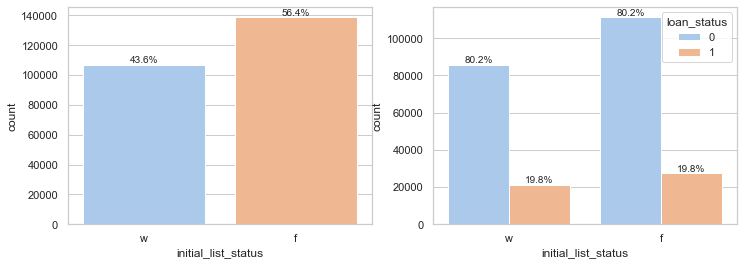

In [51]:
showplots(x=X_train['initial_list_status'], y=y_train)

**Observations**

1. Around 43% of overall records has initial list status as 'w'. Remaining 53% has initial list status as 'f'.

2. The defaulter proportion for records having 'w' and 'f' as the initial list status is same. So initial list status does not look like an important feature in predicting creditworthiness.

### application_type

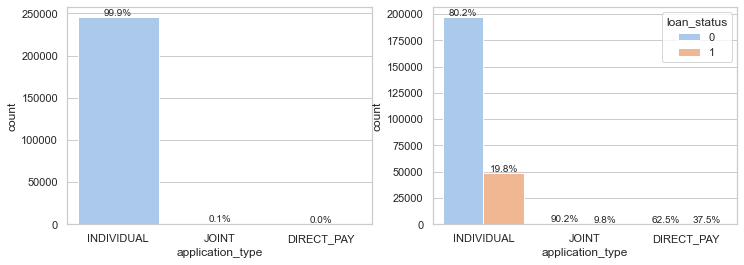

In [52]:
showplots(x=X_train['application_type'], y=y_train)

**Observations**

1. There are very few records (~0.1) for Joint application_type of Direct pay. 99.9% of the records are for individual application type. Since we do not have sufficient data for joint and direct_pay levels, we will ignore this feature in the further analysis.

### address

In [53]:
X_train['address'] = X_train['address'].str.lower().str.strip()
X_train['address'].nunique()

244780

In [54]:
X_train['address'].value_counts()

uss johnson\r\nfpo ae 48052                                   6
uscgc miller\r\nfpo aa 22690                                  6
uss smith\r\nfpo ap 70466                                     5
uss williams\r\nfpo ae 00813                                  5
usnv smith\r\nfpo ae 30723                                    5
                                                             ..
63544 jessica groves apt. 426\r\nlake tinaside, il 22690      1
2140 jeffrey dale\r\nsherristad, in 48052                     1
2529 patrick terrace\r\njenniferton, ar 00813                 1
054 williams view suite 404\r\nlake pattychester, nm 70466    1
804 amanda fort suite 126\r\neast markville, wi 22690         1
Name: address, Length: 244780, dtype: int64

In [55]:
## try extracting last 8 chars
addr_state_pin = X_train['address'].str.slice(-1, -9, -1).str.slice(start=-1, step=-1)
addr_state_pin.value_counts()

ap 70466    1374
ae 22690    1323
ap 22690    1305
aa 22690    1283
aa 30723    1273
            ... 
dc 93700     102
id 11650     102
id 86630     101
de 93700      99
md 86630      97
Name: address, Length: 540, dtype: int64

In [56]:
## try extracting last state chars
addr_state = addr_state_pin.str.slice(0,2)
df_train['addr_state'] = addr_state

#check defaulter proportion per state
np.round(1 - df_train.groupby('addr_state')['loan_status'].mean(),2)

addr_state
aa    0.80
ae    0.81
ak    0.80
al    0.80
ap    0.80
ar    0.80
az    0.80
ca    0.81
co    0.81
ct    0.81
dc    0.81
de    0.80
fl    0.81
ga    0.81
hi    0.81
ia    0.81
id    0.80
il    0.80
in    0.81
ks    0.80
ky    0.79
la    0.81
ma    0.80
md    0.80
me    0.80
mi    0.81
mn    0.82
mo    0.80
ms    0.80
mt    0.80
nc    0.79
nd    0.80
ne    0.79
nh    0.80
nj    0.80
nm    0.80
nv    0.79
ny    0.81
oh    0.81
ok    0.80
or    0.81
pa    0.80
ri    0.81
sc    0.80
sd    0.80
tn    0.80
tx    0.80
ut    0.80
va    0.80
vt    0.81
wa    0.80
wi    0.79
wv    0.79
wy    0.79
Name: loan_status, dtype: float64

**Observations**

1. There 540 unique combinations of {state, zip} in the addresses. The number of records for these combinations range from 97 to 1374. We think the combination of {state, zip} becomes too specific. We can instead check at state level.

2. There are 54 unique states. The defaulter proportion across all the states hover around 20% mark which is also the overall defaulter proportion. Thus state does not seem like an significant factor in predicting creditworthiness. We will not use this feature in further analysis.

## Understanding and preprocessing numerical features

### loan_amnt

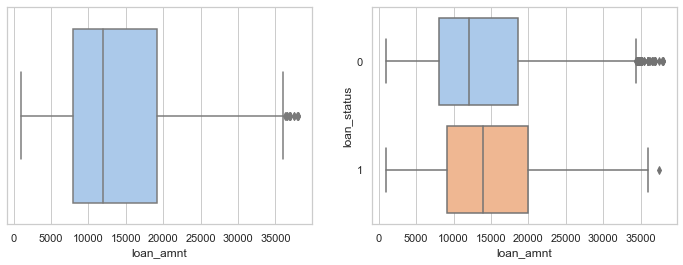

In [57]:
showplots(x=X_train['loan_amnt'], y=y_train, vartype=('num', 'cat'))

In [58]:
# print('overall')
# print(df_train['loan_amnt'].agg(['mean', 'median']))

# print('\ngrouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['loan_amnt'])

**Observations**

1. The overall mean and median loan_amnt values are 14K and 12K respectively. For defaulters, the mean loan_amount increases to 15K and median amount increases to 14K. For non-defaulters, mean loan amount is somewhat lower at 13.7K and median is at 12K. 

In [59]:
#standardizing loan_amnt
X_train['loan_amnt'] = transformation_helper.fit_transform(X_train['loan_amnt'], standardize_fn)

### int_rate

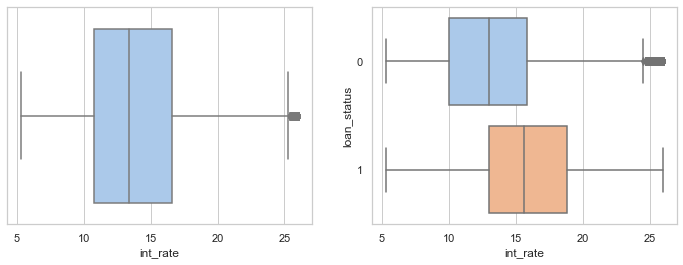

In [60]:
showplots(x=X_train['int_rate'], y=y_train, vartype=('num', 'cat'))

In [61]:
#standardizing int_rate
X_train['int_rate'] = transformation_helper.fit_transform(X_train['int_rate'], standardize_fn)

### installment

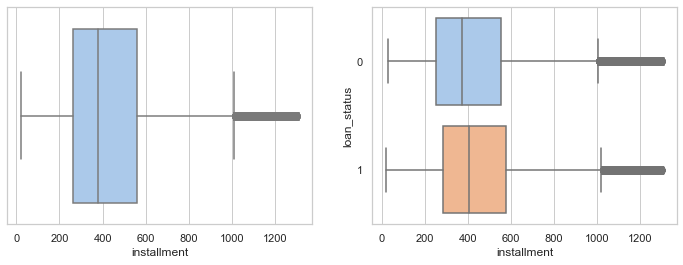

In [62]:
showplots(x=X_train['installment'], y=y_train, vartype=('num', 'cat'))

In [63]:
# we use sqrt to transform and then standardize
def tfs(params, x, **kwa): 
    return standardize_fn(params, np.sqrt(makepositive(x)), **kwa)
    
X_train['installment'] = transformation_helper.fit_transform(X_train['installment'], tfs)

### annual_inc

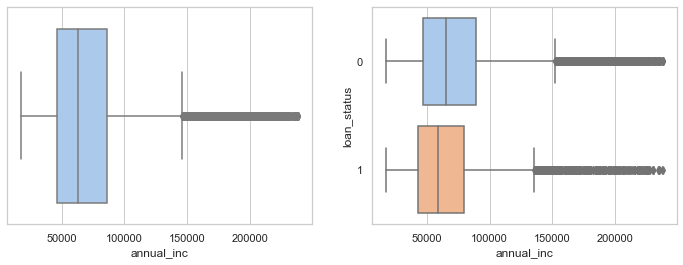

In [64]:
showplots(x=X_train['annual_inc'], y=y_train, vartype=('num', 'cat'))

In [65]:
# print('overall')
# print(df_train['annual_inc'].agg(['mean', 'median']))

# print('\ngrouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['annual_inc'])

**Observartions**

1. annual_inc is a positively skewed distribution with high percentage of outliers (as seen in the outliers treatment section).

2. The overall mean and median values are 70K and 63K. For defaulters, the mean and median values reduces to 64K and 58K respectively. On the other hand, for non-defaulters, mean and median values are 71K and 65K respectively. Thus, defaulters in general have lower annual_inc than non-defaulters. This may be an imp factor in determining creditworthiness. 

3. To reduce the number of outliers, we first take log of the annual_inc before standardizing it.

In [66]:
# we use log to transform and then standardize
def tfs(params, x, **kwa): 
    return standardize_fn(params, np.log(makepositive(x)), **kwa)
    
X_train['annual_inc'] = transformation_helper.fit_transform(X_train['annual_inc'], tfs)

### dti

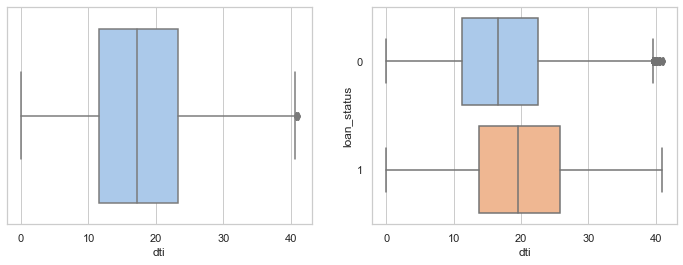

In [67]:
showplots(x=X_train['dti'], y=y_train, vartype=('num', 'cat'))

In [68]:
# print('overall')
# print(df_train['dti'].agg(['mean', 'median']))

# print('\ngrouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['dti'])

**Observations**

1. The overall mean and median values for dti is 17. However for defaulters, mean and median value increases to 19%. For non-defaulters, mean is almost equal to overall mean of 17%, however, median value reduces slightly to 16.58. In general, higher dti reduces creditworthiness. 

In [69]:
# standardize
X_train['dti'] = transformation_helper.fit_transform(X_train['dti'], standardize_fn)

### open_acc

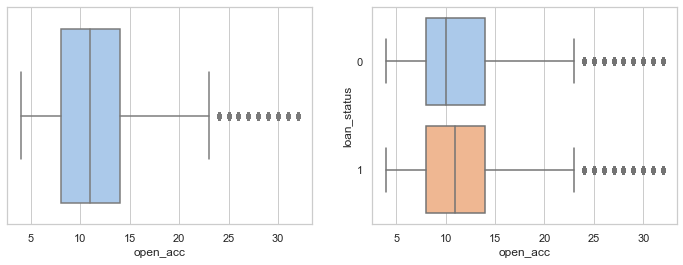

In [70]:
showplots(x=X_train['open_acc'], y=y_train, vartype=('num', 'cat'))

In [71]:
# print('overall')
# print(df_train['open_acc'].agg(['mean', 'median']))

# print('\ngrouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['open_acc'])

**Observation**

1. The mean and median value for 'open_acc' variable is 11.

2. The distributions of open_acc for loan_Status 0 and 1 looks somewhat similar, however, median for loan defaulters is 11 while for non-defaulters is 10.

3. We will take log and then standardize this feature

In [72]:
# we use log to transform and then standardize
def tfs(params, x, **kwa): 
    return standardize_fn(params, np.log(makepositive(x)), **kwa)
    
X_train['open_acc'] = transformation_helper.fit_transform(X_train['open_acc'], tfs)

### pub_rec

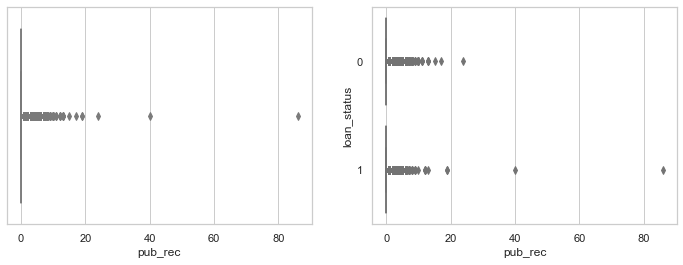

In [73]:
showplots(x=X_train['pub_rec'], y=y_train, vartype=('num', 'cat'))

#### Encoding pub_rec

As we observe, pub_rec is a highly skewed variable with average being very close to zero. For simplicity, we will convert this to a binary variable.

In [74]:
def tfn(params, x, **kwa):        
    res = x.transform(lambda x: 1 if (x > 0) else 0)
    return(res, None)
    
X_train['pub_rec'] = transformation_helper.fit_transform(X_train['pub_rec'], tfn, y=y_train)

### pub_rec_bankruptcies

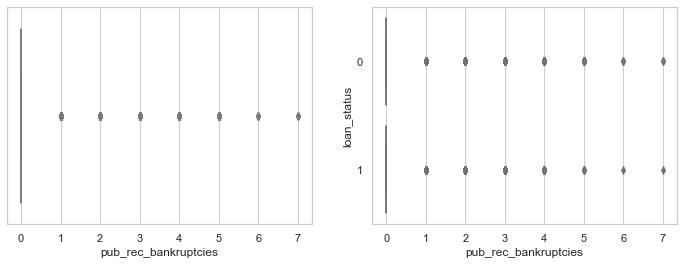

In [75]:
showplots(x=X_train['pub_rec_bankruptcies'], y=y_train, vartype=('num', 'cat'))

#### Encoding pub_rec_bankruptcies

As we observe, pub_rec_bankruptcies is a highly skewed variable with average being very close to zero. For simplicity, we will convert this to a binary variable.

In [76]:
def tfn(params, x, **kwa):        
    res = x.transform(lambda x: 1 if (x > 0) else 0)
    return(res, None)
    
X_train['pub_rec_bankruptcies'] = transformation_helper.fit_transform(X_train['pub_rec_bankruptcies'], tfn, y=y_train)

### mort_acc

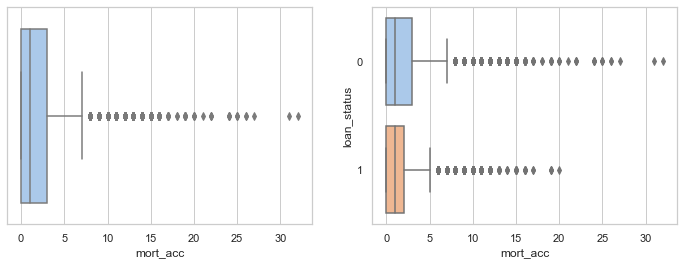

In [77]:
showplots(x=X_train['mort_acc'], y=y_train, vartype=('num', 'cat'))

#### Encoding mort_acc

As we observe, mort_acc is a highly skewed variable with average being close to zero. For simplicity, we will convert this to a binary variable.

In [78]:
def tfn(params, x, **kwa):        
    res = x.transform(lambda x: 1 if (x > 0) else 0)
    return(res, None)
    
X_train['mort_acc'] = transformation_helper.fit_transform(X_train['mort_acc'], tfn, y=y_train)

### revol_bal

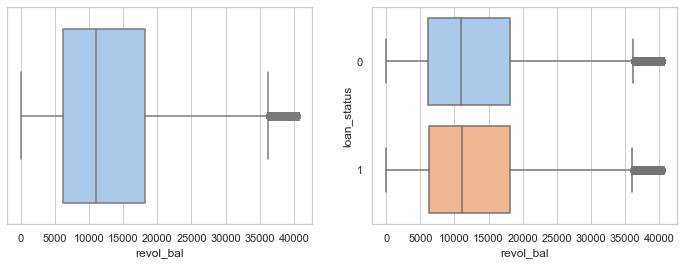

In [79]:
showplots(x=X_train['revol_bal'], y=y_train, vartype=('num', 'cat'))

In [80]:
# print('overall')
# print(df_train['revol_bal'].agg(['mean', 'median']))

# print('grouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['revol_bal'])

**Observation**

1. The mean value for 'revol_bal' variable is around 13000 and median is around 10913 (somewhat positively skewed).

2. The distributions of revol_bal for loan_Status 0 and 1 looks very identical (their median and mean values are quite close). Thus revol_bal doesn't seem like a significant factor in predicting creditworthiness of a customer.

3. revol_bal is a positively skewed distribution with a high percent of outliers on the positive side. To reduce the number of outliers, we take sqrt of values before standardizing this feature.

In [81]:
# we use sqrt to transform and then standardize
def tfs(params, x, **kwa): 
    return standardize_fn(params, np.sqrt(makepositive(x)), **kwa)
    
X_train['revol_bal'] = transformation_helper.fit_transform(X_train['revol_bal'], tfs)

### revol_util

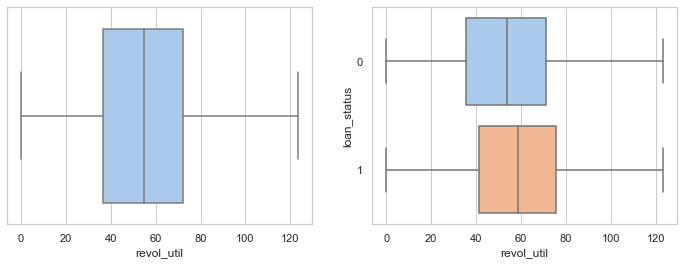

In [82]:
showplots(x=X_train['revol_util'], y=y_train, vartype=('num', 'cat'))

In [83]:
# print('overall')
# print(df_train['revol_util'].agg(['mean', 'median']))

# print('grouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['revol_util'])

**Observations**

1. Overall mean and median revol_util values are around 54.

2. For defaulters, mean and median increases to 57.7 and 59. For non-defaulters, on the other hand, mean and median values are around 53%. Thus, in general, higher revol_util seems to reduce creditworthiness of a customer.

In [84]:
# standardize
X_train['revol_util'] = transformation_helper.fit_transform(X_train['revol_util'], standardize_fn)

### total_acc

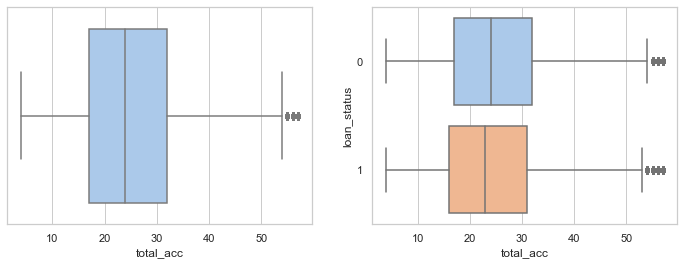

In [85]:
showplots(x=X_train['total_acc'], y=y_train, vartype=('num', 'cat'))

In [86]:
# print('overall')
# print(df_train['total_acc'].agg(['mean', 'median']))

# print('\ngrouped by loan_status')
# print(df_train.groupby('loan_status').agg(['mean', 'median'])['total_acc'])

**Observation**

1. The mean value for 'total_acc' variable is around 25 and median is around 24.

2. The distributions of total_acc for loan_Status 0 and 1 looks similar (their median and mean values are close). Thus total_acc potentially may not be a significant factor in predicting creditworthiness of a customer.

#### Standardizing total_acc

In [87]:
X_train['total_acc'] = transformation_helper.fit_transform(X_train['total_acc'], standardize_fn)

## Removing unneeded features

In [88]:
#drop col helper
def dropcols(df, cols):
    for col in cols:
        if(col in df.columns):
            df.drop(labels=[col], axis=1, inplace=True)
            
colstodrop = ['emp_title', 'title', 'earliest_cr_line', 'address', 'application_type', 'initial_list_status', 'issue_d', 'issue_d_mon', 'issue_d_qt']

dropcols(X_train, colstodrop)
dropcols(df_train, colstodrop)

In [89]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,245764.0,-6.191823e-17,1.000002,-1.637378,-0.756814,-0.253635,0.652089,3.017032
term,245764.0,2.346682e-01,0.423792,0.000000,0.000000,0.000000,0.000000,1.000000
int_rate,245764.0,-9.902155e-16,1.000002,-1.913010,-0.681400,-0.091679,0.643204,2.775272
installment,245764.0,-4.332343e-16,1.000002,-2.708741,-0.673112,-0.085176,0.653547,2.859892
grade,245764.0,-3.209909e-17,1.000002,-1.310454,-0.714885,0.140380,0.898981,2.817452
sub_grade,245764.0,-7.779955e-16,1.000002,-1.604075,-0.847743,-0.236135,0.610905,3.210289
emp_length,245764.0,-5.928149e-16,1.000002,-1.196170,-1.196170,0.305106,0.521019,2.024845
home_ownership,245764.0,-2.603906e-15,1.000002,-1.005741,-0.977952,0.270133,1.121119,1.121119
annual_inc,245764.0,3.119892e-15,1.000002,-2.783229,-0.700909,-0.013606,0.666527,2.891127
verification_status,245764.0,6.696017e-01,0.470357,0.000000,0.000000,1.000000,1.000000,1.000000


## Model building

### Helper functions

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#helper function to show VIF for all columns
def showVif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Correlation matrix and pair plot

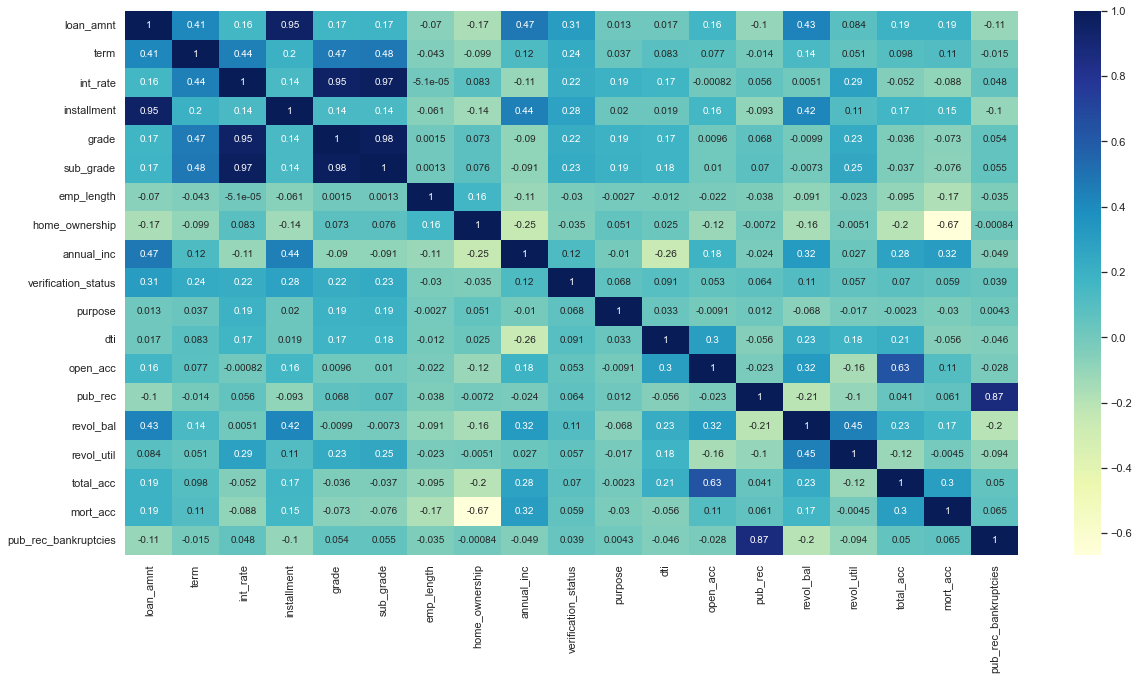

In [91]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observations**

1. Very high positive correlation between {installement, loan_amnt}, {grade, subgrade}, and {pub_rec, pub_rec_bankruptcies}

2. Very high negative correlation between {grade, int_rate}, {sub_grade, int_rate}.

3. Multicollinearity is not desirable. We may remove some of these features during the model building process.

#### Build model with all the features

In [92]:
#create a copy of X_train
X_train2 = X_train.copy(deep=True)

In [93]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               245764
Model:                            GLM   Df Residuals:                   245744
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1052e+05
Date:                Thu, 24 Nov 2022   Deviance:                   2.2103e+05
Time:                        12:12:23   Pearson chi2:                 2.42e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09106
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7628      0.014   -122.342      0.000      -1.791      -1.735
loan_amnt               -0.1569      0.026     -6.033      0.000      -0.208      -0.106
term                     0.5829      0.021     28.185      0.000       0.542       0.623
int_rate                -0.4348      0.023    -19.053      0.000      -0.480      -0.390
installment              0.2808      0.024     11.563      0.000       0.233       0.328
grade                    0.0094      0.024      0.399      0.690      -0.037       0.056
sub_grade                0.8386      0.031     27.138      0.000       0.778       0.899
emp_length               0.0239      0.005      4.359      0.000       0.013       0.035
home_ownership           0.1142      0.007     15.858      0.000       0.100       0.128
annual_inc              -0.1897      0.007    -25.922      0.000      -0.204      -0.175
verification_status      0.1138      0.013      8.823      0.000       0.088       0.139
purpose                  0.0331      0.006      5.982      0.000       0.022       0.044
dti                      0.1743      0.006     28.098      0.000       0.162       0.186
open_acc                 0.1610      0.008     20.620      0.000       0.146       0.176
pub_rec                  0.1549      0.028      5.457      0.000       0.099       0.211
revol_bal               -0.1177      0.008    -14.916      0.000      -0.133      -0.102
revol_util               0.1448      0.007     20.628      0.000       0.131       0.159
total_acc               -0.1178      0.008    -15.559      0.000      -0.133      -0.103
mort_acc                -0.0464      0.015     -3.066      0.002      -0.076      -0.017
pub_rec_bankruptcies    -0.1744      0.032     -5.524      0.000      -0.236      -0.113
========================================================================================
"""

In [94]:
showVif(X_train2)

,Features,VIF
5,sub_grade,36.96
0,loan_amnt,23.31
4,grade,20.71
3,installment,19.97
2,int_rate,18.75
13,pub_rec,4.94
18,pub_rec_bankruptcies,4.73
1,term,3.66
17,mort_acc,3.04
9,verification_status,2.49


In [95]:
colstodrop = set(['emp_length', 'sub_grade', 'installment', 'purpose', 'grade', 'home_ownership'])
showVif(X_train2[set(X_train2.columns) - colstodrop])

,Features,VIF
2,pub_rec,4.93
0,pub_rec_bankruptcies,4.72
8,mort_acc,2.14
4,verification_status,2.12
6,revol_bal,2.11
10,open_acc,2.06
12,term,1.88
7,total_acc,1.87
3,loan_amnt,1.76
1,revol_util,1.74


In [96]:
dropcols(X_train2, ['emp_length', 'sub_grade', 'installment', 'purpose', 'grade', 'home_ownership'])

# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               245764
Model:                            GLM   Df Residuals:                   245750
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1149e+05
Date:                Thu, 24 Nov 2022   Deviance:                   2.2297e+05
Time:                        12:12:42   Pearson chi2:                 2.43e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08385
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6668      0.013   -131.408      0.000      -1.692      -1.642
loan_amnt                0.1347      0.007     18.413      0.000       0.120       0.149
term                     0.4991      0.014     35.463      0.000       0.472       0.527
int_rate                 0.4232      0.006     65.477      0.000       0.411       0.436
annual_inc              -0.1820      0.007    -25.089      0.000      -0.196      -0.168
verification_status      0.1420      0.013     11.056      0.000       0.117       0.167
dti                      0.1994      0.006     32.464      0.000       0.187       0.211
open_acc                 0.1596      0.008     20.609      0.000       0.144       0.175
pub_rec                  0.2131      0.028      7.552      0.000       0.158       0.268
revol_bal               -0.1436      0.008    -18.381      0.000      -0.159      -0.128
revol_util               0.1292      0.007     18.585      0.000       0.116       0.143
total_acc               -0.1185      0.008    -15.759      0.000      -0.133      -0.104
mort_acc                -0.2067      0.012    -17.523      0.000      -0.230      -0.184
pub_rec_bankruptcies    -0.1995      0.031     -6.356      0.000      -0.261      -0.138
========================================================================================
"""

In [97]:
showVif(X_train2)

,Features,VIF
7,pub_rec,4.93
12,pub_rec_bankruptcies,4.72
11,mort_acc,2.14
4,verification_status,2.12
8,revol_bal,2.11
6,open_acc,2.06
1,term,1.88
10,total_acc,1.87
0,loan_amnt,1.76
9,revol_util,1.74


**Observations**

1. The initial model included all the predictor variables and exhibited very high multi-collinearity (VIF > 5 for several features). We incremently removed features with high VIF values and build several versions of models. 

2. After excluding 'emp_length', 'sub_grade', 'installment', 'purpose', 'grade', 'home_ownership', we are able to bring VIF values for all remaining features < 5.

## Model evaluation

### Building final model using sklearn

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight="balanced")
logsk.fit(X_train2, y_train)

LogisticRegression(class_weight='balanced')

### Preparing test data

In [99]:
# Drop unnecessary columns from x_test
colstodrop = ['emp_title', 'title', 'earliest_cr_line', 'address', 'application_type', 'initial_list_status', 'issue_d', 'issue_d_mon', 'issue_d_qt'] + ['emp_length', 'sub_grade', 'installment', 'purpose', 'grade', 'home_ownership']
dropcols(X_test, colstodrop)

# transform all features (using params fit during training)
transformation_helper.transform_all(X_test)
y_test = transformation_helper.transform(y_test)

In [100]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,61441.0,-0.007584,1.000052,-1.637378,-0.756814,-0.253635,0.636364,2.765442
term,61441.0,0.230432,0.421113,0.000000,0.000000,0.000000,0.000000,1.000000
int_rate,61441.0,-0.003236,0.996886,-1.913010,-0.683668,-0.091679,0.643204,2.775272
annual_inc,61441.0,-0.009212,0.996778,-2.780766,-0.724794,-0.013606,0.640966,2.891127
verification_status,61441.0,0.668300,0.470828,0.000000,0.000000,1.000000,1.000000,1.000000
dti,61441.0,-0.006333,0.997355,-2.205999,-0.753820,-0.072133,0.690855,2.923534
open_acc,61441.0,-0.004110,1.003795,-2.331353,-0.644118,0.131051,0.718079,2.730351
pub_rec,61441.0,0.157940,0.364688,0.000000,0.000000,0.000000,0.000000,1.000000
revol_bal,61441.0,-0.005894,0.999149,-2.671586,-0.722535,-0.075985,0.681780,2.353118
revol_util,61441.0,-0.005982,0.996568,-2.275018,-0.734174,0.025694,0.764455,2.925859


### Prediction on test data

In [101]:
y_pred_arr = logsk.predict_proba(X_test) #probablity of NOT defaulting (being creditworthy)
y_pred = y_pred_arr[:,1]

### ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
from sklearn import metrics
    
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

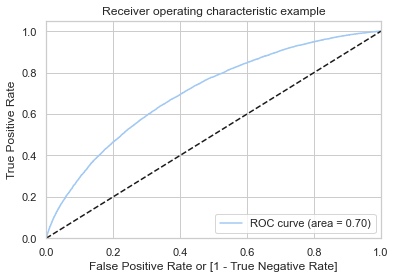

In [103]:
fpr, tpr, thresholds = draw_roc(y_test, y_pred)

### Finding optimal cutoff

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
from sklearn.metrics import confusion_matrix

# define function to compute classification metrics
def classification_metrics(y, y_pred, thr):
    y_hat = list(map(lambda p: 1 if (p>=thr) else 0, y_pred))
    cm = metrics.confusion_matrix(y, y_hat)
    
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    P = TP + FN
    N = TN + FP
    
    acc = (TP + TN) / float(P + N + 0.001)
    prec = (TP) / float(TP + FP + 0.001)
    sens = (TP) / float(P + 0.001)
    spec = (TN) / float(N + 0.001)
    f1 = 2*prec*sens / (prec + sens + 0.001)
    
    return (acc, prec, sens, spec, f1)

In [105]:
num = np.linspace(0,1,21)
res = []
for i in num:
    acc, prec, sens, spec, f1 = classification_metrics(y_test, y_pred, i)
    res.append([i, acc, prec, sens, spec, f1])
    
cutoff_df = pd.DataFrame(res, columns=['threshold', 'acc', 'precision', 'sensitivity', 'specificity', 'f1'])
cutoff_df

,threshold,acc,precision,sensitivity,specificity,f1
0,0.00,0.199150,0.199150,1.000000,0.000000,0.331876
1,0.05,0.199150,0.199150,1.000000,0.000000,0.331876
2,0.10,0.199834,0.199277,0.999918,0.000874,0.332047
3,0.15,0.211911,0.201469,0.997875,0.016462,0.334971
4,0.20,0.249849,0.208407,0.988722,0.066111,0.343963
5,0.25,0.309907,0.219905,0.967718,0.146327,0.358071
6,0.30,0.378444,0.233985,0.932821,0.240585,0.373805
7,0.35,0.453004,0.250956,0.880026,0.346814,0.390196
8,0.40,0.527172,0.270844,0.812112,0.456315,0.405839
9,0.45,0.595498,0.293144,0.730631,0.561894,0.418004


<AxesSubplot:xlabel='threshold'>

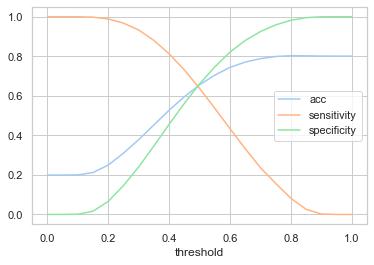

In [106]:
cutoff_df.plot.line(x='threshold', y=['acc','sensitivity','specificity'])

**Observation** - 

1. At threshold value ~0.5, we get close to equal balance of sensitivity(0.63) and specificity(0.67). 

2. If we wish to take a more conservative approach, we can decrease threshold further (and thus increasing sensitivity). For example, setting threshold of 0.3 will give us sensitivity of 0.93 but it would reduce specificity to 0.24.

<AxesSubplot:xlabel='sensitivity', ylabel='precision'>

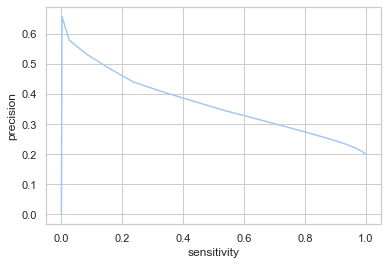

In [107]:
### Precision Recall curve

sns.lineplot(data=cutoff_df, x='sensitivity', y='precision')

### Tradeoff Questions:

**1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Ans:** There is a trade-off between Precision and Recall (sensitivity). Precision metric is a ratio of True positives and total predicted positives; that is TP / (TP + FP). Thus it penalizes FP and increases as TP increases. Recall (or sensitivity), on the other hand, is a ratio of True positives and actual positives; that is TP / (TP + FN). Thus recall penalizes FN and increases as TP increases. As per the question, if we wish to detect real defaulters (that is high TP), and also have less False positives, then we should essentially look for high precision model (as it penalizes FPs and increases with TP). This, however, means that we may have to settle with a low recall model because of precision-recall trade-off.

In order to have higher precision, we should set threshold to a higher value (that is more customers will be classified as creditworthy). 

**2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**

**Ans:** In this scenario, we want to penalize False negatives (that is giving loans to defaulters). Thus our priority is to have a high recall(sensitivity) model. This, however, means that we may have to settle with low precision model.

In order to have high recall, we should set threshold to a lower value (that is less customers will be classified as creditworthy, thus reducing false negatives)

### Questionnaire 

#### 1. What percentage of customers have fully paid their Loan Amount?

Ans: Around 80%

#### 2. Comment about the correlation between Loan Amount and Installment features.

Ans: There is a strong positive correlation(~0.95) between loan amount and installment features. In our model, therefore we removed installation feature.

#### 3. The majority of people have home ownership as *Mortgage*.

#### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

True, as the load grade increase from A to G, the proportion of defaulters also increase. 


#### 5. Name the top 2 afforded job titles.

Manager and teacher

#### 6. Thinking from a bank's perspective, which metric should our primary focus be on..
    - ROC AUC
    - Precision
    - Recall
    - F1 Score
    
Ans: Most bank would prefer to take a conservative approach in giving loans. This means, the model should aim to minimize False negatives (that is giving loans to potential defaulters). Thus, the model should have a high recall. Since we aim for high recall, precision may reduce. Banks who are willing to take more risks (to capitalize on higher interest rates by awarding somewhat riskier loans), can look at F1 score as it balances recall and precision scores. ROC AUC curve is useful in choosing the correct threshold value to achieve appropriate recall/f1 score. 

Thus, ROC/AUC, Recall, and F1 score are important from a bank's perspective.     

#### 7. How does the gap in precision and recall affect the bank?

The gap in precision and recall means that bank has to choose between **A.** approving only safer loans, thus reducing NPA, but at the same time missing out on potential business opportunity to charge higher interest rates on somewhat risky loans, and **B**, giving somewhat risky loans to customers at higher interest rates,and thus increasing earning potential, but at the same time, taking the risk of NPAs. 


#### 8. Which were the features that heavily affected the outcome?

The logistic regression coefficient B associated with a predictor X is the expected change in log odds of having the outcome per unit change in X. So increasing the predictor by 1 unit (or going from 1 level to the next) multiplies the odds of having the outcome by e^B. As per the summary from statsmodel output, **term** and **interest rates** are the two most important features. Other important features include pub_rec, mort_acc, pub_rec_bankruptcies, dti, and annual_inc.

#### 9. Will the results be affected by geographical location? (Yes/No)

No, There are 54 unique states. The defaulter proportion across all the states hover around 20% mark which is also the overall defaulter proportion. Thus state does not seem like an significant factor in predicting creditworthiness. 

### Insights : Please see observations at the end of each section.

### Business Recommendations

1. The model to check creditworthiness of a customer is tunable through a threshold parameter. At threshold value 0.2, the model attempts to find a balance between being too conservative to avoid risky loans and capitalizing on earning potential by giving out higher interest but somewhat risky loans. At lower threshold values, the model will act conservative and thus approving only less risky loans. Given the current uncertainty around economy, the business should consider lower threshold value (say 0.1) for a more conservative approach. 

2. The average defaulter rate is 20%.

3. 60 months term loans are more than twice likely to default than 36 months loans. Similarly, as the loan grade/sub_grade increases, the defaulter rate increases as well. Grade A and B have below average defaulter rate, while the other grades have above average defaulter rate, with grade F and G having more than 50% defaulter rate.

4. Higher interest loans, and high amount loans are more likely to default. 

5. As dti value increases beyond average value of 17, default risk increases. 

6. Customers who stay on rent or have employment of < 1 year have above average defaulter rate. 

7. Customers who are needed to be verified (or source verified) have higher defaulter rate than the average defaulter rate. 
